### Drive Right

Drive Right is a smart Navigation App that aims to reduce carbon dioxide emissions and help users save fuel and choose the most fuel efficient route through data analysis.

In [0]:
import pandas as pd

import numpy as np

from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import matplotlib.pyplot as plt

import sklearn

import seaborn as sns


In [3]:
from google.colab import files
fileOne = files.upload()

Saving MPGvsCO2.csv to MPGvsCO2.csv


In [4]:
fileTwo = files.upload()

Saving TrafficCongestionVsCO2.csv to TrafficCongestionVsCO2.csv


In [0]:
datasetOne = pd.read_csv('MPGvsCO2.csv')

datasetTwo = pd.read_csv('TrafficCongestionVsCO2.csv')

In [6]:
datasetOne.head(50)


,MPG1,CO2 Emission1,MPG2,CO2 Emissions2,MPG3,CO2 Emissions3
0,19,423.190476,15,493.722222,17,444.350000
1,9,807.909091,15,493.722222,17,467.736842
2,23,329.148148,17,444.350000,18,444.350000
3,10,807.909091,9,807.909091,17,467.736842
4,17,467.736842,15,493.722222,11,683.615385
5,21,403.954545,16,493.722222,19,423.190476
6,22,355.480000,17,467.736842,21,386.391304
7,23,370.291667,17,444.350000,18,444.350000
8,23,341.807692,16,493.722222,21,386.391304
9,23,355.480000,16,467.736842,19,423.190476


In [7]:
datasetTwo.head(50)

,Traffic1,CO21,Traffic2,CO22,Traffic3,CO23
0,165,350.83,23,101.20,69,213.0
1,89,200.84,47,156.80,56,165.7
2,84,234.60,70,214.00,83,234.4
3,76,227.90,221,354.67,99,272.5
4,210,369.69,210,149.69,103,286.2
5,45,154.60,36,144.44,25,108.8
6,32,138.90,63,200.78,189,330.1
7,57,169.96,225,420.93,96,263.7
8,225,420.69,91,265.47,73,222.1
9,89,263.65,154,366.84,119,296.8


# Data set 1 - Finding best route based on co2 emissions - Fuel economy

Text(0, 0.5, 'Co2 Emissions for Route A')

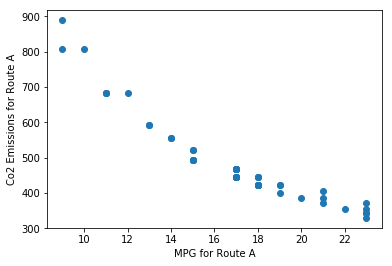

In [8]:
emissionA = datasetOne['CO2 Emission1'] #y - axis
mpgA = datasetOne['MPG1'] #x - axis

plt.scatter(mpgA,emissionA)
plt.xlabel('MPG for Route A')
plt.ylabel('Co2 Emissions for Route A')

Linear Regression model

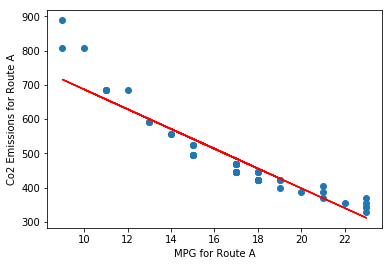

0.9152722865773731


In [9]:
XA = mpgA.values.reshape(-1,1)
YA = emissionA.values.reshape(-1,1)

from sklearn.model_selection import train_test_split

XA_train, XA_test, YA_train, YA_test = train_test_split(XA,YA,test_size = 0.35, random_state = 1)

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(XA_train,YA_train);

yA_pred = regressor.predict(XA_test);

plt.scatter(mpgA,emissionA)
plt.xlabel('MPG for Route A')
plt.ylabel('Co2 Emissions for Route A')
plt.plot(XA_test,yA_pred,color = 'red');
plt.show()

print(regressor.score(XA_train,YA_train))




Text(0, 0.5, 'Co2 Emissions for Route B')

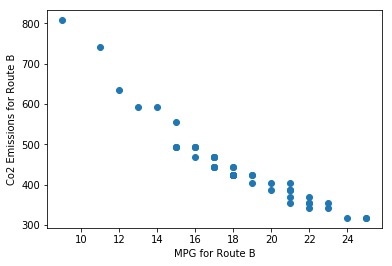

In [10]:
emissionB = datasetOne['CO2 Emissions2']

mpgB = datasetOne['MPG2']

plt.scatter(mpgB,emissionB)
plt.xlabel('MPG for Route B')
plt.ylabel('Co2 Emissions for Route B')



Linear Regression

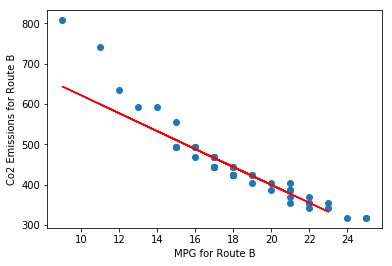

0.9244373265903751


In [11]:
XB = mpgB.values.reshape(-1,1)
YB = emissionB.values.reshape(-1,1)

from sklearn.model_selection import train_test_split

XB_train, XB_test, YB_train, YB_test = train_test_split(XB,YB,test_size = 0.35, random_state = 1)

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(XB_train,YB_train);

yB_pred = regressor.predict(XB_test);

plt.scatter(mpgB,emissionB)
plt.xlabel('MPG for Route B')
plt.ylabel('Co2 Emissions for Route B')
plt.plot(XB_test,yB_pred,color = 'red');
plt.show()

print(regressor.score(XB_train,YB_train))



Text(0, 0.5, 'Co2 Emissions for Route C')

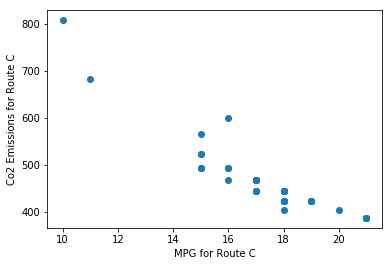

In [12]:
emissionC = datasetOne['CO2 Emissions3']

mpgC = datasetOne['MPG3']

plt.scatter(mpgC,emissionC)
plt.xlabel('MPG for Route C')
plt.ylabel('Co2 Emissions for Route C')

Linear Regression

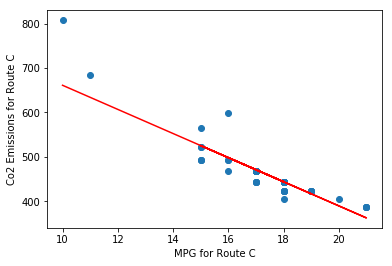

0.89467670000807


In [13]:
XC = mpgC.values.reshape(-1,1)
YC = emissionC.values.reshape(-1,1)

from sklearn.model_selection import train_test_split

XC_train, XC_test, YC_train, YC_test = train_test_split(XC,YC,test_size = 0.35, random_state = 1)

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(XC_train,YC_train);

yC_pred = regressor.predict(XC_test);

plt.scatter(mpgC,emissionC)
plt.xlabel('MPG for Route C')
plt.ylabel('Co2 Emissions for Route C')
plt.plot(XC_test,yC_pred,color = 'red');
plt.show()

print(regressor.score(XC_train,YC_train))



# Dataset 2 - To finalize the route - CO2 emissions vs Traffic in the route

Text(0, 0.5, 'Co2 Emissions for Route A')

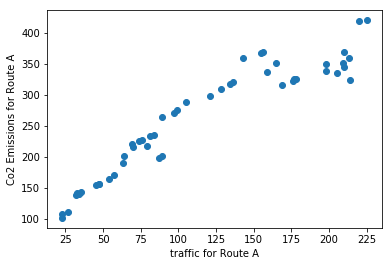

In [14]:
trafficA = datasetTwo['Traffic1']

emissionsA2 = datasetTwo['CO21']

plt.scatter(trafficA,emissionsA2)
plt.xlabel('traffic for Route A')
plt.ylabel('Co2 Emissions for Route A')

Linear Regression

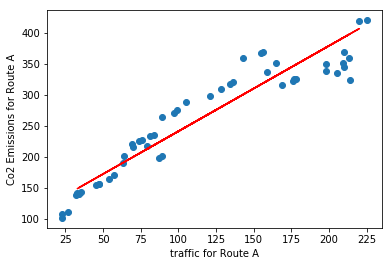

0.9147126665935555


In [15]:
XA2 = trafficA.values.reshape(-1,1)
YA2 = emissionsA2.values.reshape(-1,1)

from sklearn.model_selection import train_test_split

XA2_train, XA2_test, YA2_train, YA2_test = train_test_split(XA2,YA2,test_size = 0.35, random_state = 1)

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(XA2_train,YA2_train);

yA2_pred = regressor.predict(XA2_test);


plt.scatter(trafficA,emissionsA2)
plt.xlabel('traffic for Route A')
plt.ylabel('Co2 Emissions for Route A')
plt.plot(XA2_test,yA2_pred,color = 'red');
plt.show()

print(regressor.score(XA2_train,YA2_train))





Text(0, 0.5, 'Co2 Emissions for Route B')

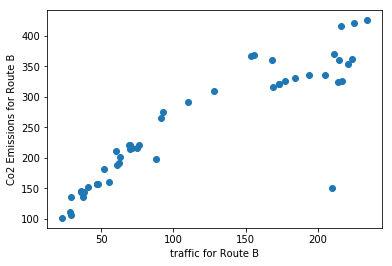

In [16]:
trafficB = datasetTwo['Traffic2']

emissionsB2 = datasetTwo['CO22']

plt.scatter(trafficB,emissionsB2)
plt.xlabel('traffic for Route B')
plt.ylabel('Co2 Emissions for Route B')

Linear Regression

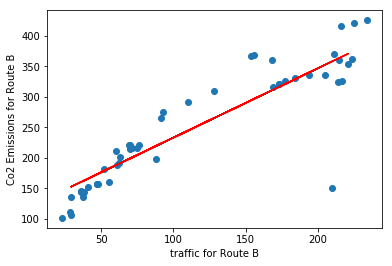

0.7459136363803789


In [17]:
XB2 = trafficB.values.reshape(-1,1)
YB2 = emissionsB2.values.reshape(-1,1)

from sklearn.model_selection import train_test_split

XB2_train, XB2_test, YB2_train, YB2_test = train_test_split(XB2,YB2,test_size = 0.35, random_state = 1)

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(XB2_train,YB2_train);

yB2_pred = regressor.predict(XB2_test);


plt.scatter(trafficB,emissionsB2)
plt.xlabel('traffic for Route B')
plt.ylabel('Co2 Emissions for Route B')
plt.plot(XB2_test,yB2_pred,color = 'red');
plt.show()

print(regressor.score(XB2_train,YB2_train))



Text(0, 0.5, 'Co2 Emissions for Route C')

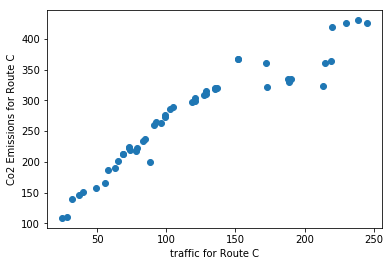

In [18]:
trafficC = datasetTwo['Traffic3']

emissionsC2 = datasetTwo['CO23']

plt.scatter(trafficC,emissionsC2)
plt.xlabel('traffic for Route C')
plt.ylabel('Co2 Emissions for Route C')

Linear Regression

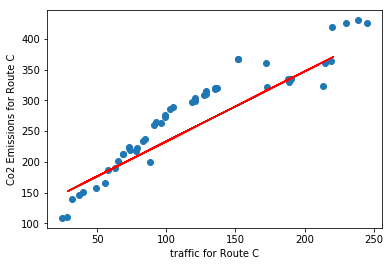

0.7459136363803789


In [19]:
XC2 = trafficC.values.reshape(-1,1)
YC2 = emissionsC2.values.reshape(-1,1)

from sklearn.model_selection import train_test_split

XC2_train, XC2_test, YC2_train, YC2_test = train_test_split(XB2,YB2,test_size = 0.35, random_state = 1)

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()

regressor.fit(XC2_train,YC2_train);

yC2_pred = regressor.predict(XC2_test);


plt.scatter(trafficC,emissionsC2)
plt.xlabel('traffic for Route C')
plt.ylabel('Co2 Emissions for Route C')
plt.plot(XC2_test,yC2_pred,color = 'red');
plt.show()

print(regressor.score(XC2_train,YC2_train))

